<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-118/blob/main/Equipo118_Tarea2_Modulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Actividad 1 : Semana 4**

Materia:
Ciencia y analítica de datos

Fecha: 11/10/2022

Integrantes:

Octavio Alberto García Morán - A01213977

Diana Valeria García Briones - A01793006



---


##**PARTE 1: Ejercicio Guiado PCA**

**Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos.**

In [ ]:
#Importación de Librerias y del conjunto de datos:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df1 = pd.read_csv(url)

**Muestreo de los primeros 10 registros de la base de datos**

In [ ]:
df1.head(5) #Validación de que los datos se importaron correctamente

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


**Adicionalmente, se explora la dimensión de la base de datos para identificar el número de columnas y filas, así como los diferentes tipos de variables.**

In [ ]:
print('Dimensión del conjunto (Filas & Columnas): ',df1.shape)

Dimensión del conjunto (Filas & Columnas):  (30000, 25)


In [ ]:
df1.info() #Tipos de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

**NOTA: Antes de comenzar aplicar la metodología PCA se optó por hacer una limpieza de datos, pues de lo contrario, al realizar la extracción de los componentes principales, estos podrían estar sesgados o equivocados; Además que de forma teórica se representan las técnicas de reducción de dimensionalidad como una actividad sujeta a la limpieza de datos.**

**Revisamos la existencia de valores nulos en toda la base de datos:**

In [ ]:
df1.isnull().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

**Revisando las estadísticas descriptivas, podemos imputar la media en los valores nulos (la media no está muy separada de la mediana en muchos de los casos). Por lo que sustituimos los valores nulos por la mediana:**

In [ ]:
column_means = df1.mean() #Se utiliza la funcion mean para utilizar la mediana en los datos
df2 = df1.fillna(column_means)
df2.head(5)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


**Revisamos que no existan valores nulos, despues de la sustitución:**

In [ ]:
df2.isnull().any()

ID     False
X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

**Cada registro cuenta con 23 tipos de variables, por lo que es importante realizar una reducción de dimensionalidad (Identificando las variables mas importantes); Para poder aplicar PCA es importante recordar que este debe ser aplicado únicamente en variables númericas.**

**En la descripcion del modelo https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt menciona que las variables de x1 a x11 son categoricas, por lo que deben ser excluidas**

In [ ]:
df3 = df2.iloc[:,12:23]
print(df3)

            X12       X13       X14      X15      X16      X17      X18  \
0        3913.0    3102.0     689.0      0.0      0.0      0.0      0.0   
1        2682.0    1725.0    2682.0   3272.0   3455.0   3261.0      0.0   
2       29239.0   14027.0   13559.0  14331.0  14948.0  15549.0   1518.0   
3       46990.0   48233.0   49291.0  28314.0  28959.0  29547.0   2000.0   
4        8617.0    5670.0   35835.0  20940.0  19146.0  19131.0   2000.0   
...         ...       ...       ...      ...      ...      ...      ...   
29995  188948.0  192815.0  208365.0  88004.0  31237.0  15980.0   8500.0   
29996    1683.0    1828.0    3502.0   8979.0   5190.0      0.0   1837.0   
29997    3565.0    3356.0    2758.0  20878.0  20582.0  19357.0      0.0   
29998   -1645.0   78379.0   76304.0  52774.0  11855.0  48944.0  85900.0   
29999   47929.0   48905.0   49764.0  36535.0  32428.0  15313.0   2078.0   

           X19      X20     X21      X22  
0        689.0      0.0     0.0      0.0  
1       1000.

**Buscamos la correlacion entre las variables númericas que quedaron**

In [ ]:
df3.corr()

,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22
X12,1.000000,0.951480,0.892266,0.860257,0.829763,0.802630,0.140271,0.099319,0.156903,0.158269,0.167031
X13,0.951480,1.000000,0.928320,0.892470,0.859767,0.831577,0.280366,0.100817,0.150718,0.147368,0.157952
X14,0.892266,0.928320,1.000000,0.923962,0.883894,0.853305,0.244348,0.316914,0.130022,0.143373,0.179713
X15,0.860257,0.892470,0.923962,1.000000,0.940131,0.900918,0.233011,0.207529,0.300018,0.130154,0.160414
X16,0.829763,0.859767,0.883894,0.940131,1.000000,0.946161,0.217053,0.181210,0.252299,0.293076,0.141555
X17,0.802630,0.831577,0.853305,0.900918,0.946161,1.000000,0.199993,0.172633,0.233767,0.250210,0.307699
X18,0.140271,0.280366,0.244348,0.233011,0.217053,0.199993,1.000000,0.285601,0.252206,0.199588,0.148469
X19,0.099319,0.100817,0.316914,0.207529,0.181210,0.172633,0.285601,1.000000,0.244770,0.180096,0.180894
X20,0.156903,0.150718,0.130022,0.300018,0.252299,0.233767,0.252206,0.244770,1.000000,0.216342,0.159173
X21,0.158269,0.147368,0.143373,0.130154,0.293076,0.250210,0.199588,0.180096,0.216342,1.000000,0.151825


**Convertimos nuestra tabla en una matriz de correlacion para que sea mas facil visualizar los elementos que tienen una mayor correlación**

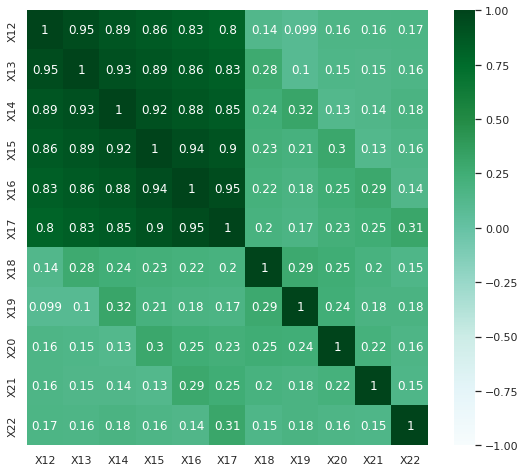

In [ ]:
import seaborn as seab
matrizc = df3.corr()
seab.set(rc = {'figure.figsize':(9,8)})
seab.heatmap(matrizc, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

**Podemos observar que los conjuntos de x12 y x13, así como x16 y x17 son los que representan una mayor correlación. Posteriormente buscamos la covariancia en el primer par para validar el tipo de relación que existe dependiendo del signo**

In [ ]:
#Varianza por Atributo
x12_var = df3.X12.var()
x13_var = df3.X13.var()
x16_var = df3.X16.var()
x17_var = df3.X17.var()

#Varianza total
Tot_Varianza = df3.var().sum()

#Porcentaje de Variacion
print('Varianza Total \t',Tot_Varianza.round(2))
print('Varianza x12 \t',((x12_var/Tot_Varianza)*100).round(2),'%')
print('Varianza x13 \t',((x13_var/Tot_Varianza)*100).round(2),'%')
print('Varianza x16 \t',((x16_var/Tot_Varianza)*100).round(2),'%')
print('Varianza x17 \t',((x17_var/Tot_Varianza)*100).round(2),'%')

Varianza Total 	 28270075137.05
Varianza x12 	 19.18 %
Varianza x13 	 17.92 %
Varianza x16 	 13.07 %
Varianza x17 	 12.54 %


**Como observamos previamente en la matriz de correlaciones, habia diferentes pares con un alto grado de de dependencia, por lo que los porcentajes diferentes atributos pueden tener un alto porcentaje de varianza, sin embargo, la varianza en X12 y X13 siguen siendo las mas elevadas**

**Hacemos un grafico para ver como se compone la relación entre el primer par de variables**

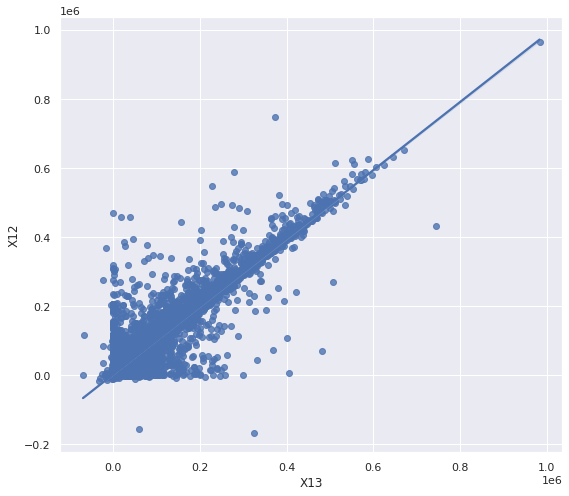

In [ ]:
Grafico = seab.regplot(data = df3,  
                x = df3.X13, 
                y = df3.X12,
               ) 
Grafico

**Como se muestra, dentro del de correlación existen variables que generan una relacion negativa, sin embargo, en primera instancia podemos concluir que las las variables X12,X13,X15,X16,X17 son hasta ahora las muestras mas representativas con mayor varianza.**

#PCA
**Paso 2: Interprete cada componente principal en términos de las variables originales.** 

**Antes de extraer los Componentes principales debemos cooparar los valores de las otras varianzas para conocer el comportamiento de la relación**

In [ ]:
#Importamos Librerias
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
pcs = PCA(n_components=2)

pcs.fit(df3[['X12', 'X13']]) #Los valores de las funciones toman los valores de X12 y X13

pcsSummary = pd.DataFrame({'Desviación Estándar': np.sqrt(pcs.explained_variance_),
                          'Proporción de varianza': pcs.explained_variance_ratio_,
                          'Varianza Acumulada': np.cumsum(pcs.explained_variance_ratio_)
                          }
                          )
pcsSummary

,Desviación Estándar,Proporción de varianza,Varianza Acumulada
0,101156.999575,0.975769,0.975769
1,15940.745326,0.024231,1.000000


**Se modifica la tabla para tener una lectura mas facil y se asigna el nombre de Componente 1 y Componente 2, respectivamente**

In [ ]:
pcsSummary = pcsSummary.transpose() #Para una lectura mas facil se traspone la Tabla
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary.round(4)

,PC1,PC2
Desviación Estándar,101156.9996,15940.7453
Proporción de varianza,0.9758,0.0242
Varianza Acumulada,0.9758,1.0000


**Despues de la reasginación de varianza observamos que el PC1 consigue el 97% de varianza, mientras que PC2 solo consigue un 3% de la proporcion total de la varianza.Volviendose PC1 el componente mas importante.**

#SCREE PLOT

**Para la realización del grafico primero debemos almacenar los componentes en un arreglo e importar las librerias necesarias**

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

PC_components = np.arange(pcs.n_components_) + 1

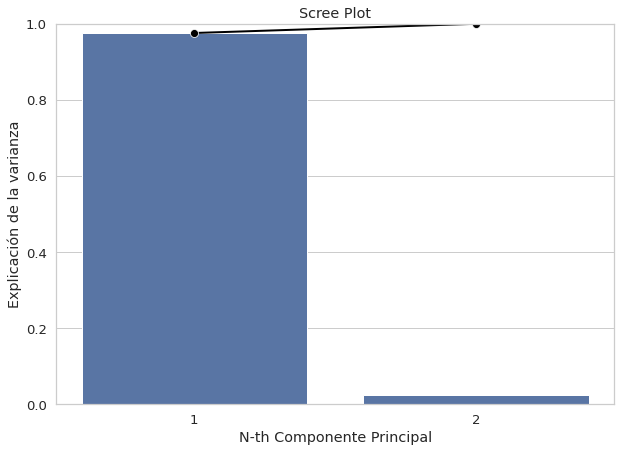

In [ ]:
#Creación del Grafico
Grafico2 = seab.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

Grafico2 = seab.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

Grafico2 = seab.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Componente Principal')
plt.ylabel('Explicación de la varianza')
plt.ylim(0, 1)
plt.show()

**Podemos comprobar que el Componente 1, tiene mayor varianza, por lo que podemos deducir que tiene una mayor cantidad de variabilidad en los datos**

**Posteriormente podemos hacer una comprobación de componentes donde primera columna muestra los coeficientes de combinación lineal que define PC1**

In [ ]:
validacion_com = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2'],
                                index=['X1', 'X2']
                                )
validacion_com

,PC1,PC2
X1,0.719624,-0.694364
X2,0.694364,0.719624


**La validación se utiliza para calcular las puntuaciones de los componentes principales, que son los valores proyectados de X1 y la clasificación en los nuevos ejes.**

#Interpretación de los componentes originales

**Analizaremos todos los componentes del frame para validar si los componentes fueron seleccionados correctamente, esta vez antes de realizar la extracción de componentes haremos una estandarización para obtener mejores resultados:**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Funcion para estandarizar
scaled = scaler.fit_transform(df3)

scaled_df = pd.DataFrame(scaled, columns=df3.columns) #Asignamos Nombre a las columnas
scaled_df.head(5)

,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22
0,-0.642721,-0.647594,-0.668203,-0.672731,-0.663322,-0.652911,-0.341931,-0.227145,-0.296813,-0.308143,-0.314201
1,-0.659440,-0.666943,-0.639463,-0.621867,-0.606489,-0.598151,-0.341931,-0.213647,-0.240013,-0.244309,-0.314201
2,-0.298760,-0.494087,-0.482609,-0.449952,-0.417433,-0.391805,-0.250273,-0.191946,-0.240013,-0.244309,-0.248747
3,-0.057678,-0.013457,0.032672,-0.232583,-0.186958,-0.156743,-0.221170,-0.169420,-0.228653,-0.237926,-0.244230
4,-0.578834,-0.611511,-0.161373,-0.347213,-0.348378,-0.331654,-0.221170,1.334985,0.271182,0.266363,-0.269103


**Analizamos las varianzas de cada conjunto, así como los valores minimos y maximos, para confirmar que no existan picos o brechas significativas entre los datos:**

In [ ]:
cols = ["X12", "X13"] 
summary = {
"Varianza": scaled_df[cols].var()[0:2],
"Valor Min": scaled_df[cols].min()[0:2],
"Valor Max": scaled_df[cols].max()[0:2]
}
#recuerda que la variable cols la definimos más arriba.
pd.DataFrame(summary, index = cols).transpose()

,X12,X13
Varianza,1.000033,1.000033
Valor Min,-2.944661,-1.671620
Valor Max,12.403478,13.134066


**Obtenemos los componentes principales de todas las variables númericas que se tenian originalmente, las cuales abarcan de X12 a X22**

In [ ]:
pcs = PCA()
pcs.fit(scaled_df.iloc[:,:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Desviación Estándar': np.sqrt(pcs.explained_variance_),
                          'Proporción de varianza': pcs.explained_variance_ratio_,
                          'Varianza Acumulada': np.cumsum(pcs.explained_variance_ratio_)
                          }
                          )
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) +1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Desviación Estándar,2.3932,1.2437,0.9515,0.9356,0.8827,0.8550,0.5217,0.2684,0.2050,0.1600,0.1527
Proporción de varianza,0.5206,0.1406,0.0823,0.0796,0.0708,0.0665,0.0247,0.0066,0.0038,0.0023,0.0021
Varianza Acumulada,0.5206,0.6613,0.7436,0.8231,0.8940,0.9604,0.9852,0.9917,0.9956,0.9979,1.0000


#Gráfico para la interpretacion de todos los datos originales.

**Realizamos el grafico para todos los componentes**

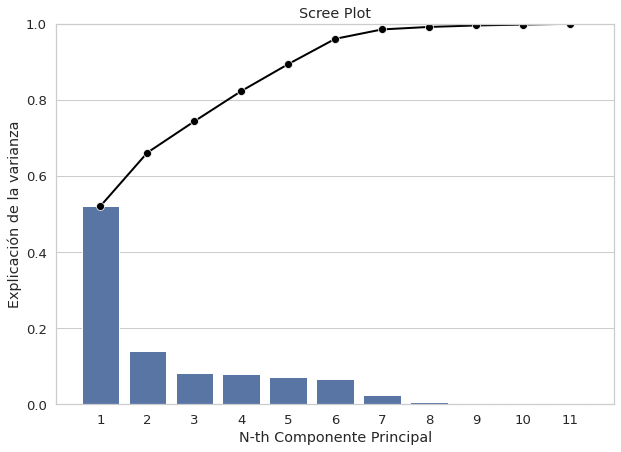

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

Scree2 = seab.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

Scree2 = seab.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

Scree2 = seab.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )
plt.title('Scree Plot')
plt.xlabel('N-th Componente Principal')
plt.ylabel('Explicación de la varianza')
plt.ylim(0, 1)
plt.show()

**Podemos comprobar que los PC1 y PC2 siguen siendo el conjunto con una mayor varianza.**

**Comprobamos el porcentaje de varianza que representan:**

In [ ]:
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]
((pcsSummary_df.iloc[2][2])*100).round(2)

74.36

**Los primeros dos componentes representan el 74% del total de la variacion.**

**Para saber cuales son esos componentes asignamos como index los factores de los que se derivan:**


In [ ]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df3.iloc[::].columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
X12,0.381394,-0.187502,-0.029338,-0.014221,0.003426,-0.007662,0.568996,0.411346,-0.437178,-0.176782,-0.320795
X13,0.393036,-0.158228,0.046125,0.021602,-0.043082,-0.145478,0.381265,0.051951,0.348741,0.302091,0.658735
X14,0.397843,-0.096241,0.075008,0.143633,-0.120872,0.098295,0.122923,-0.471346,0.505445,-0.049612,-0.535460
X15,0.401080,-0.086946,0.079692,0.026543,0.128885,0.035857,-0.198418,-0.532478,-0.461534,-0.399038,0.333879
X16,0.398000,-0.067211,0.018015,-0.143474,0.001540,0.057274,-0.417589,0.047685,-0.277465,0.724610,-0.184894
X17,0.390676,-0.045455,-0.151003,-0.034469,0.029252,0.020855,-0.511449,0.522878,0.334542,-0.413986,0.041730
X18,0.131374,0.448690,0.383984,0.159654,-0.237866,-0.728383,-0.073074,0.048685,-0.067073,-0.043183,-0.085380
X19,0.113005,0.489946,0.261326,0.417171,-0.251992,0.629041,0.041011,0.148218,-0.068919,0.030405,0.127839
X20,0.123830,0.459707,0.146293,-0.225416,0.812189,0.048682,0.134123,0.006258,0.127554,0.030648,-0.062150
X21,0.112506,0.397580,-0.228175,-0.741816,-0.426654,0.102176,0.114103,-0.111321,0.011553,-0.085762,0.039289


**Despues de esto analizamos la cantidad de componentes que se necesitan para obtener un mayor porcentaje de varianza. Por lo que podemos reducir nuestra dimension de 11 a 5, sin arriesgarse un a tener una perdida significativa de información**

In [ ]:
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]
((pcsSummary_df.iloc[2][6])*100).round(2)

98.52

**Los primeros 6 Componentes representan el 98% de la varianza del conjunto**

In [ ]:
pcsComponents_dfX.PC1.nlargest(3)

X15    0.401080
X16    0.398000
X14    0.397843
Name: PC1, dtype: float64

**Arriba se muestran las variables de X mas representativas, del PC1 que es hasta ahora el mas significativo.**

**En la siguiente parte veremos de manera distinta la gráfica presentada y nos ayudará a determinar el número de componentes necesarios.**

In [ ]:
from sklearn.decomposition import PCA
#Se define el número de PCA a generar 
n=scaled_df.shape[1]

#encontrando los PCA
pca = PCA(n_components=n, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(scaled_df))

#varianza explicada por cada PCA
exp_var = pca.explained_variance_ratio_


# número mínimo de componentes que explican el 90% de la varianza
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Número de PCA que explican al menos el 90% de la varianza: ", ix+1)
    break

Número de PCA que explican al menos el 90% de la varianza:  6


Text(0, 0.5, 'Varianza explicada acumulada')

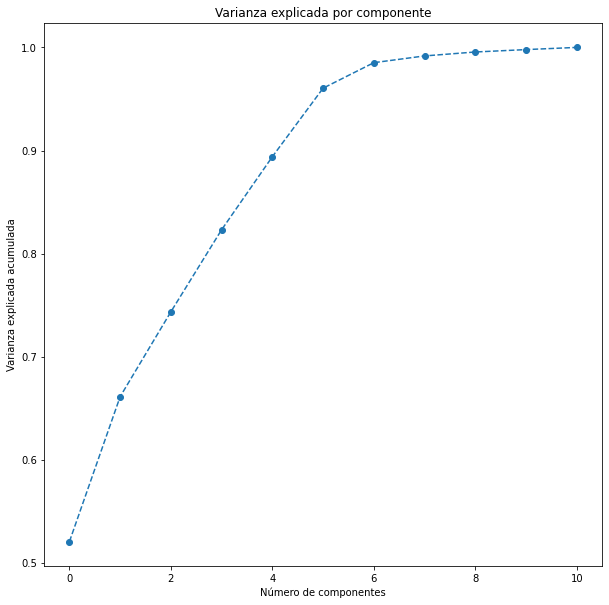

In [ ]:
import matplotlib.pyplot as plt
# gráfica de la varianza explicada por componente
plt.figure(figsize = (10,10))
plt.plot(range(0,11), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Varianza explicada por componente")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")

**Paso 3: Identifique valores atípicos**

**Finalmente, se muestra una gráfica de distribución y una boxplot para explorar los valores atipícos que podemos encontrar en nuestros datos. En general se observan una cantidad importante de outliers y las variables después de la X18, parecen estar cargadas a la izquierda**


X12
Skew : 2.66


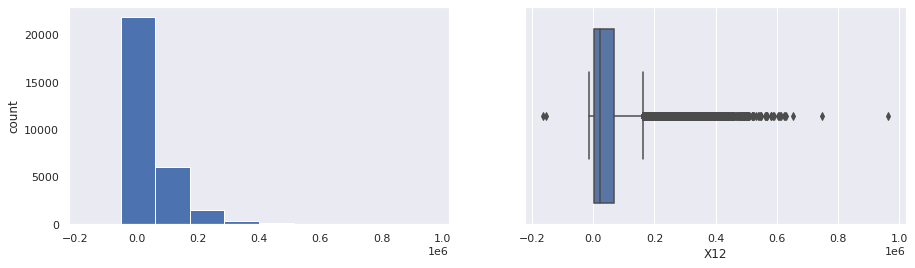

X13
Skew : 2.71


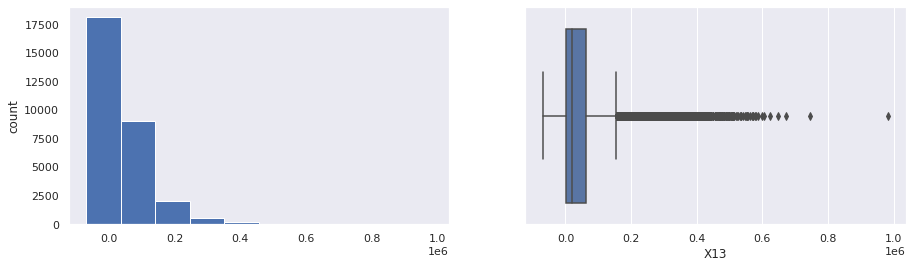

X14
Skew : 3.09


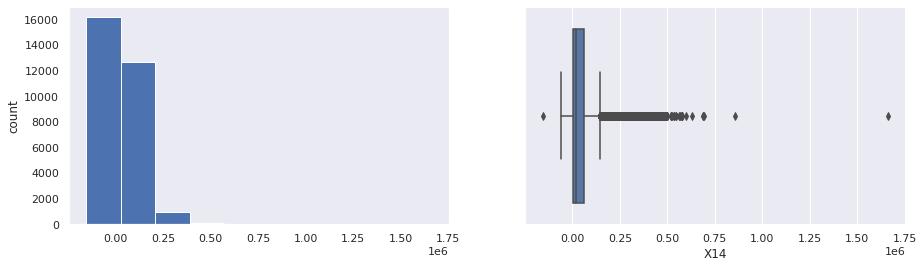

X15
Skew : 2.82


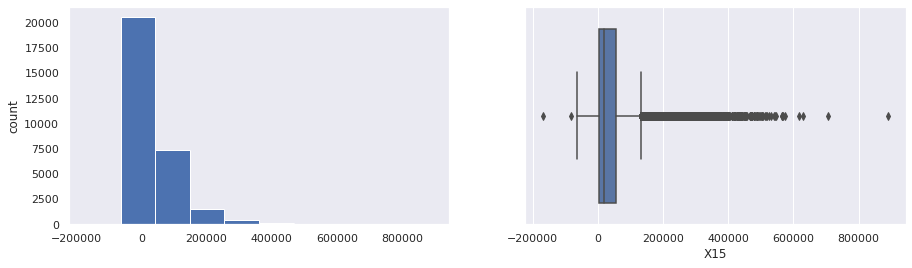

X16
Skew : 2.88


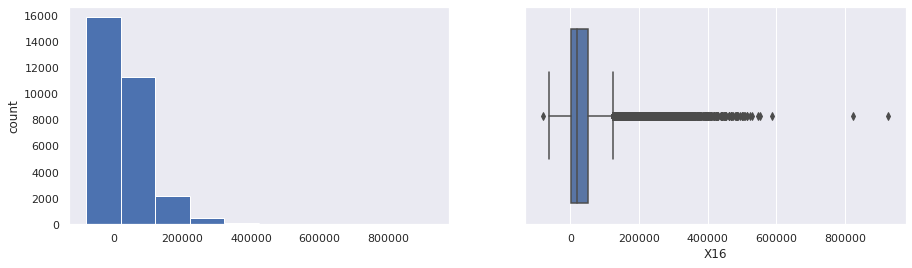

X17
Skew : 2.85


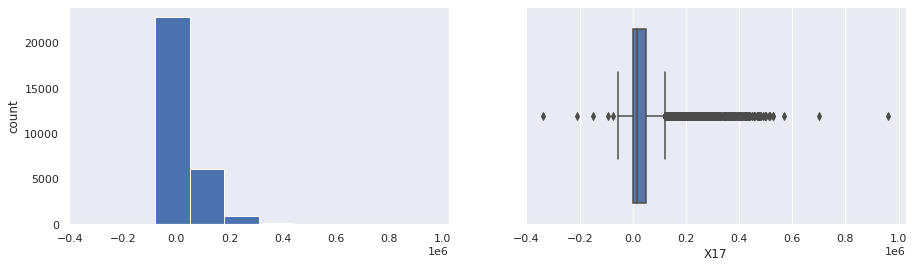

X18
Skew : 14.67


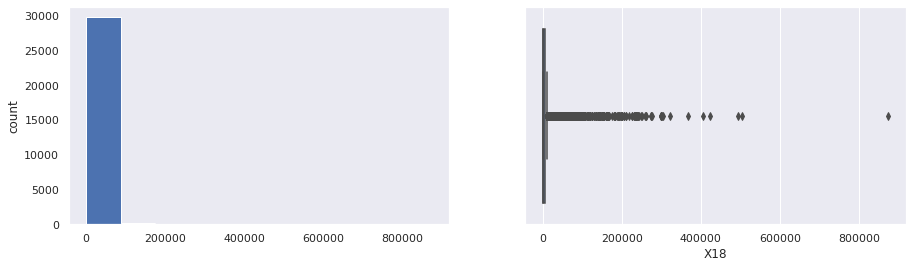

X19
Skew : 30.45


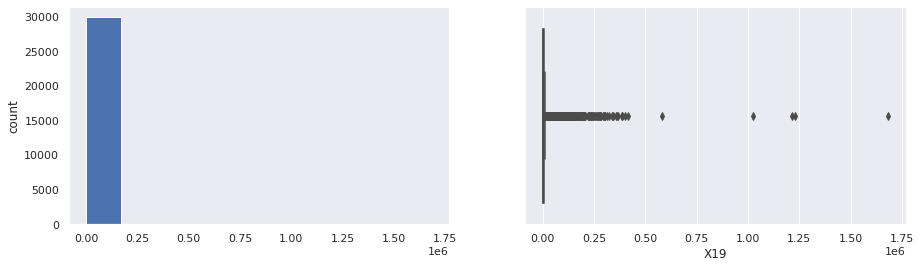

X20
Skew : 17.22


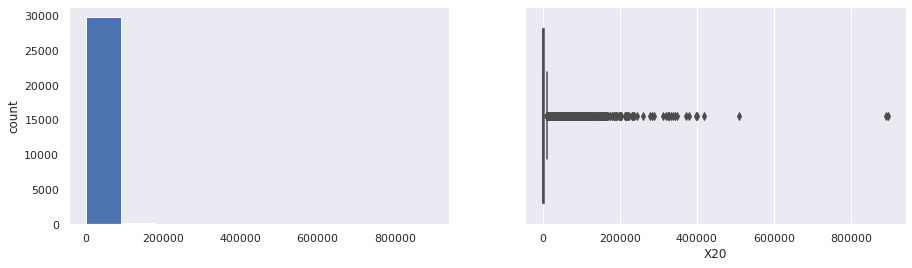

X21
Skew : 12.91


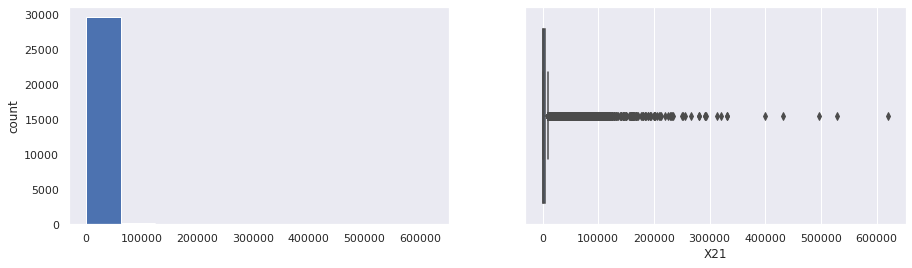

X22
Skew : 11.13


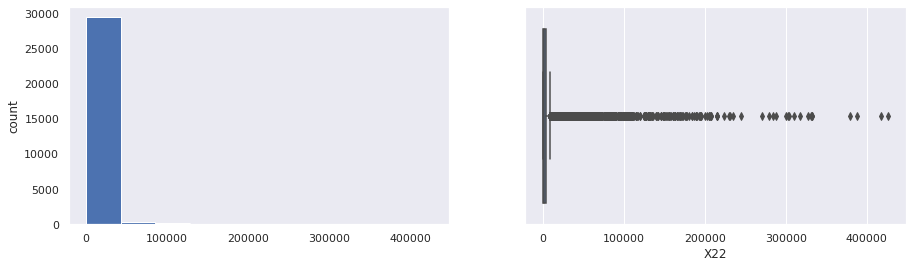

In [ ]:
import seaborn as sns

for col in df3.columns:
    print(col)
    print('Skew :',round(df3[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df3[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df3[col])
    plt.show()

**También, en la siguiente tabla, se revisará la importancia de cada uno de las variables originales dentro de cada uno de los PCA definidos, dependiendo del PCA que se observe la importancia de las variables cambia, sin embargo, generalmente las mas importantes se concentran en x18-x22 o en x14-x16**

In [ ]:
pc_comps = ['PC1','PC2','PC3','PC4','PC5','PC6']
data_pca = pd.DataFrame(np.round(pca.components_[:6,:],2),index=pc_comps,columns=scaled_df.columns)
data_pca.T

,PC1,PC2,PC3,PC4,PC5,PC6
X12,0.38,-0.19,-0.03,-0.01,0.00,-0.01
X13,0.39,-0.16,0.05,0.02,-0.04,-0.15
X14,0.40,-0.10,0.08,0.14,-0.12,0.10
X15,0.40,-0.09,0.08,0.03,0.13,0.04
X16,0.40,-0.07,0.02,-0.14,0.00,0.06
X17,0.39,-0.05,-0.15,-0.03,0.03,0.02
X18,0.13,0.45,0.38,0.16,-0.24,-0.73
X19,0.11,0.49,0.26,0.42,-0.25,0.63
X20,0.12,0.46,0.15,-0.23,0.81,0.05
X21,0.11,0.40,-0.23,-0.74,-0.43,0.10


In [ ]:
def color_high(val):
    if val <= -0.40: # definición del 40%
        return 'background: pink'
    elif val >= 0.40:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6
X12,0.380000,-0.190000,-0.030000,-0.010000,0.000000,-0.010000
X13,0.390000,-0.160000,0.050000,0.020000,-0.040000,-0.150000
X14,0.400000,-0.100000,0.080000,0.140000,-0.120000,0.100000
X15,0.400000,-0.090000,0.080000,0.030000,0.130000,0.040000
X16,0.400000,-0.070000,0.020000,-0.140000,0.000000,0.060000
X17,0.390000,-0.050000,-0.150000,-0.030000,0.030000,0.020000
X18,0.130000,0.450000,0.380000,0.160000,-0.240000,-0.730000
X19,0.110000,0.490000,0.260000,0.420000,-0.250000,0.630000
X20,0.120000,0.460000,0.150000,-0.230000,0.810000,0.050000
X21,0.110000,0.400000,-0.230000,-0.740000,-0.430000,0.100000


##**PARTE 3**

***1	¿Cuál es el número de componentes mínimo y por qué?***

Tomando como referencia todo el análisis realizado en el notebook, se puede determinar, gracias a la gráfica y al resumen realizado, qué el número óptimo de componentes mínimo es de 6, ya que este número reduce de 11 features a 6, es decir, reduce las dimensiones en 45.5%& y únicamente se pierde el 10% de la variación explicada. Entonces, estos 6 principales componentes retienen el 90.0% de la variación total y después de realizar una normalización de datos utilizando las escalas para reducir las diferencias, las primeras 6 variables alcanzaron hasta un 98% de la representación en las variables, por lo que se puede decir que esta es la cantidad ideal para retener una cantidad considerable.


***2	¿Cuál es la variación de los datos que representan esos componentes?***

Estos 6 componentes explican el 90.0% de la variación total explicada, es decir, únicamente se pierde el 10% de la variación total y se reduce de manera importante la cantidad de features.

***3	¿Cuál es la pérdida de información después de realizar PCA?***
Con base en la respuesta anterior se puede decir que se pierden 5 dimensiones y solamente el 10.0% de la variación total explicada parece ser un intercambio razonable, considerando que se puede reducir en casi la mitad el número de las dimensiones por un 10% de la variación total explicada. Creemos que si se hace una comparación de desventajas-ventajas sobre reducir esta cantidad de dimensiones, por la cantidad de información que se "pierde", la aplicación de PCA es bastante viable, considerando que entre más dimensiones se tenga el tiempo y dificultad para el análisis de se incrementa considerablemente.


***4	De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?***

Haciendo uso de las tablas obtenidas anteriormente, dependiendo del PCA que se observe, las variables más relevantes que se pueden observar son las que van de x12 a x-16 y las que van de x18 a x21, ya que son las que tienen valores más altos del 40%+-


***5	¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?***

Se recomienda emplear técnicas de reducción de información cuando se tiene mucha información y es necesario reducir el número de variables a considerar, ya que es común que se tengan muchas de relleno o que no expliquen de manera correcta las variaciones, esto implica que los modelos se pueden distorcionar y también es importante recordar que los recursos computacionales son límitados y se deben óptimizar en todo momento.

Para ML, la reducción de dimensiones permite modelar de manera más rápida y con información más certera para realizar análisis más robustos o predicciones con menores errores.